# instalação e importação de pacotes

In [1]:
# instalação de pacotes
!pip install nltk
# importação de bibliotecas
import nltk
import string
import re
import numpy as np
import pandas as pd

# Carregando os dados

In [2]:
df = pd.read_csv('/content/Restaurant_Reviews.tsv',sep='\t')

# Análise dos dados

In [4]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [6]:
# tamanho do dataframe
df.shape

(1000, 2)

In [8]:
# divisão dos dados
print(df.Liked.value_counts())

1    500
0    500
Name: Liked, dtype: int64


#Gráficos

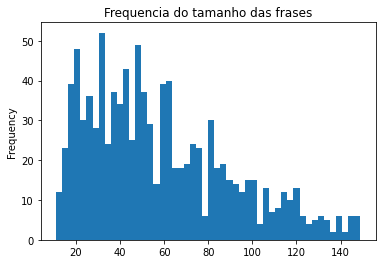

In [12]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Frequencia do tamanho das frases')
df['Review'].apply(len).plot(bins=50,kind = 'hist')

Text(0, 0.5, 'Número de comentários')

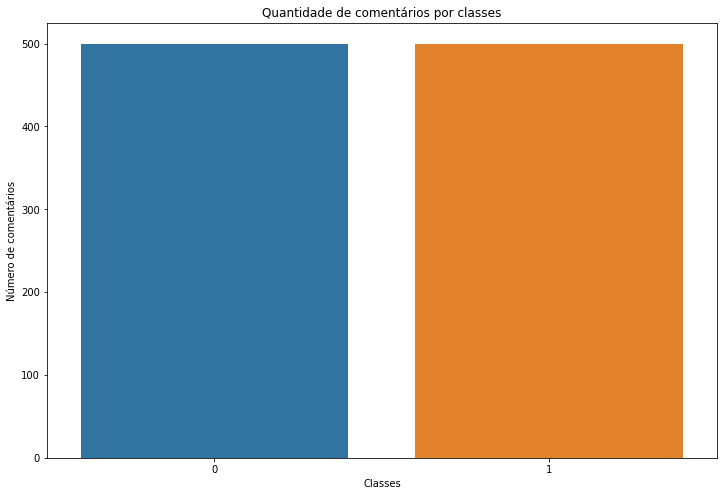

In [10]:
import seaborn as sns
plt.figure(figsize=(12,8))
fg = sns.countplot(x= df["Liked"])
fg.set_title("Quantidade de comentários por classes")
fg.set_xlabel("Classes")
fg.set_ylabel("Número de comentários")

# Limpeza dos dados

In [13]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
#for i in range(0, 1000):
for i,row in df.iterrows():
  # deixa apenas letras e substitui o resto (pontuação) por espaço (' ')
  review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
  # torna todas as letras minúsculas 
  review = review.lower()
  # retira cada palavras separadas por espaços 
  review = review.split()
  # Stemmer 
  ps = PorterStemmer()
  # stopwords em inlgês 
  all_stopwords = stopwords.words('english')
  # retira 'not' do conjunto de 'stopwords'
  all_stopwords.remove('not')
  # laço de repetição em uma linha 
  # passa por cada palavra do revisão, retira as 'stopwords' e aplica 'Stemming'
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  # Junta cada palavra no vetor (review) por meio de um espaço (' ')
  review = ' '.join(review)
  # adiciona 'review' processado no 'corpus' 
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

#Criando o modelo Bag Of Words

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [22]:
print(cv.get_feature_names())

['absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'accordingli', 'account', 'ach', 'acknowledg', 'across', 'actual', 'ad', 'afford', 'afternoon', 'ago', 'ahead', 'airlin', 'airport', 'ala', 'albondiga', 'allergi', 'almond', 'almost', 'alon', 'also', 'although', 'alway', 'amaz', 'ambianc', 'ambienc', 'amount', 'ampl', 'andddd', 'angri', 'annoy', 'anoth', 'anticip', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'apart', 'apolog', 'app', 'appal', 'appar', 'appeal', 'appet', 'appetit', 'appl', 'approv', 'area', 'arepa', 'aria', 'around', 'array', 'arriv', 'articl', 'ask', 'assur', 'ate', 'atmospher', 'atroci', 'attach', 'attack', 'attent', 'attitud', 'auju', 'authent', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom', 'awkward', 'awkwardli', 'ayc', 'az', 'baba', 'babi', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakeri', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'bare', 'bargain', 'bartend', 'base', 'basebal', 'basic', 'batch', 'bathroom', 'batter', 'bay', 'bbq', 

# Separando entre dados de teste e de treino

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Treinamento

In [28]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Avaliação do Treinamento

In [33]:
y_train_pred = classifier.predict(X_train)
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]

#Matriz de Confusão

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Matriz de confusão ')
print(cm)
print('Acurácia no treino -> ',accuracy_score(y_train,y_train_pred))
print('Acurácia no teste  -> ',accuracy_score(y_test,y_pred))

Matriz de confusão 
[[79 18]
 [24 79]]
Acurácia no treino ->  0.97875
Acurácia no teste  ->  0.79


#WordCloud

{'absolut': 0.07086614173228346,
 'alway': 0.11811023622047244,
 'amaz': 0.1889763779527559,
 'ambianc': 0.05511811023622047,
 'anoth': 0.047244094488188976,
 'area': 0.05511811023622047,
 'around': 0.06299212598425197,
 'ask': 0.07874015748031496,
 'atmospher': 0.08661417322834646,
 'attent': 0.06299212598425197,
 'avoid': 0.047244094488188976,
 'awesom': 0.09448818897637795,
 'back': 0.2125984251968504,
 'bad': 0.14173228346456693,
 'bar': 0.07086614173228346,
 'beer': 0.07086614173228346,
 'best': 0.23622047244094488,
 'better': 0.12598425196850394,
 'bit': 0.07086614173228346,
 'bland': 0.08661417322834646,
 'breakfast': 0.07874015748031496,
 'buffet': 0.09448818897637795,
 'burger': 0.12598425196850394,
 'busi': 0.06299212598425197,
 'came': 0.15748031496062992,
 'check': 0.07874015748031496,
 'chicken': 0.14173228346456693,
 'chip': 0.06299212598425197,
 'clean': 0.07086614173228346,
 'cold': 0.07086614173228346,
 'come': 0.10236220472440945,
 'come back': 0.06299212598425197,
 '

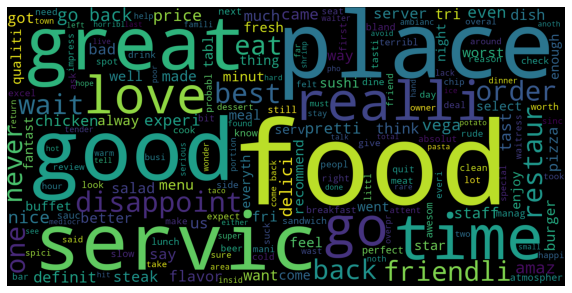

In [31]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
corpus_summary = " ".join(s for s in corpus)
stopwords = set(STOPWORDS)
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(corpus_summary)
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);
wordcloud.to_file("wordcloud.png")
wordcloud.words_